# A análise quantitativa de commodities e ações envolve a aplicação de técnicas estatísticas, matemáticas e computacionais para estudar o comportamento desses ativos, identificar padrões e desenvolver estratégias de trading. Abaixo, vou guiar você por um processo completo de análise quantitativa de commodities e ações usando Python, incluindo coleta de dados, análise exploratória, modelagem e visualização.

# 1. Bibliotecas Necessárias
Primeiro, instale e importe as bibliotecas necessárias:

In [2]:
!pip install yfinance pandas numpy matplotlib seaborn scipy statsmodels

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm

# 2. Coleta de Dados
Vamos usar o yfinance para baixar dados históricos de commodities e ações. Aqui estão alguns exemplos de tickers:

Commodities:

Ouro: GC=F

Prata: SI=F

Petróleo Brent: BZ=F

Soja: ZS=F

Café: KC=F

Ações:

Petrobras: PBR

Vale: VALE

Apple: AAPL

Tesla: TSLA

Exemplo de coleta de dados para o ouro e uma ação:

In [4]:
# Baixar dados históricos do ouro e da Petrobras
gold_data = yf.download('GC=F', start='2010-01-01', end='2023-10-01')
petrobras_data = yf.download('PBR', start='2010-01-01', end='2023-10-01')

print(gold_data.head())
print(petrobras_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951    184
2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976     53
2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024    363
2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976     56
2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951     54
Price           Close       High        Low       Open    Volume
Ticker            PBR        PBR        PBR        PBR       PBR
Date                                                            
2010-01-04  14.267825  14.405522  14.209230  14.320561  14639500
2010-01-05  14.121337  14.302980  14.062742  14.259034  16470900
2010-01-06  14.329350  14.458259  14.071533  14.094972  12562100
2010-01-07  14.121337  14.311769  14.092039  14.29

# Repita o processo para outras commodities e ações de interesse.

# 3. Análise Exploratória dos Dados (EDA)
3.1. Estatísticas Descritivas
Calcule estatísticas básicas, como média, desvio padrão, mínimo e máximo:

In [5]:
print(gold_data['Close'].describe())
print(petrobras_data['Close'].describe())

Ticker         GC=F
count   3456.000000
mean    1475.507204
std      265.890914
min     1050.800049
25%     1251.099976
50%     1368.450012
75%     1728.099976
max     2051.500000
Ticker          PBR
count   3459.000000
mean       5.550254
std        2.948019
min        0.971663
25%        3.318300
50%        4.900401
75%        7.203687
max       14.329350


# 3.2. Visualização dos Preços
Plote a série temporal dos preços ajustados:

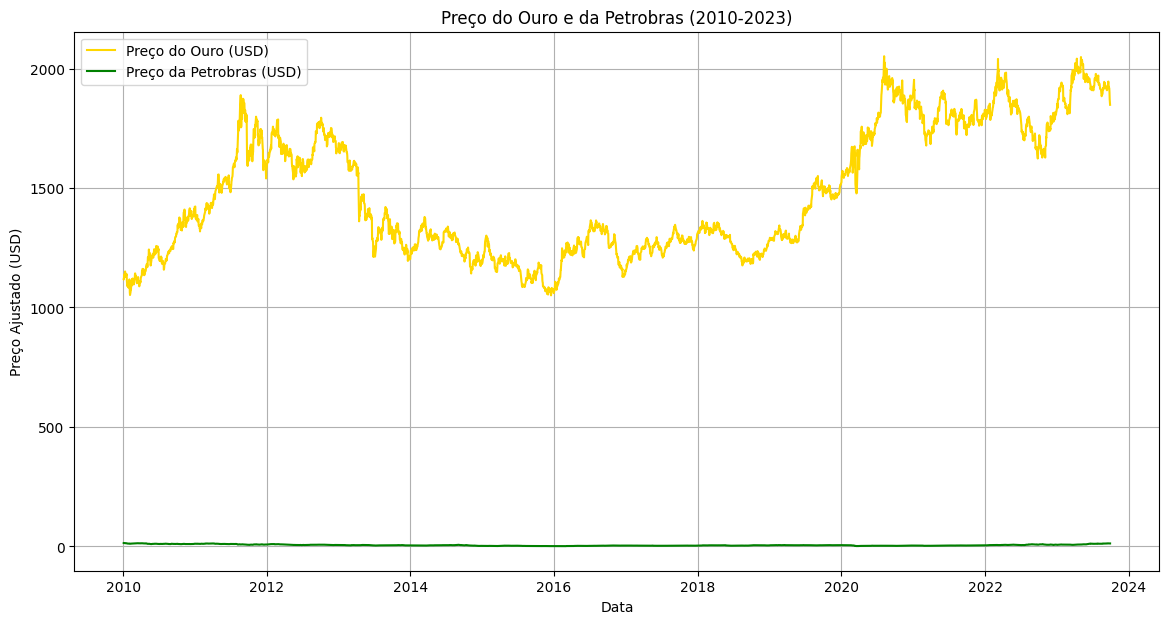

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Close'], label='Preço do Ouro (USD)', color='gold')
plt.plot(petrobras_data['Close'], label='Preço da Petrobras (USD)', color='green')
plt.title('Preço do Ouro e da Petrobras (2010-2023)')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 3.3. Retornos Diários
Calcule e visualize os retornos diários:

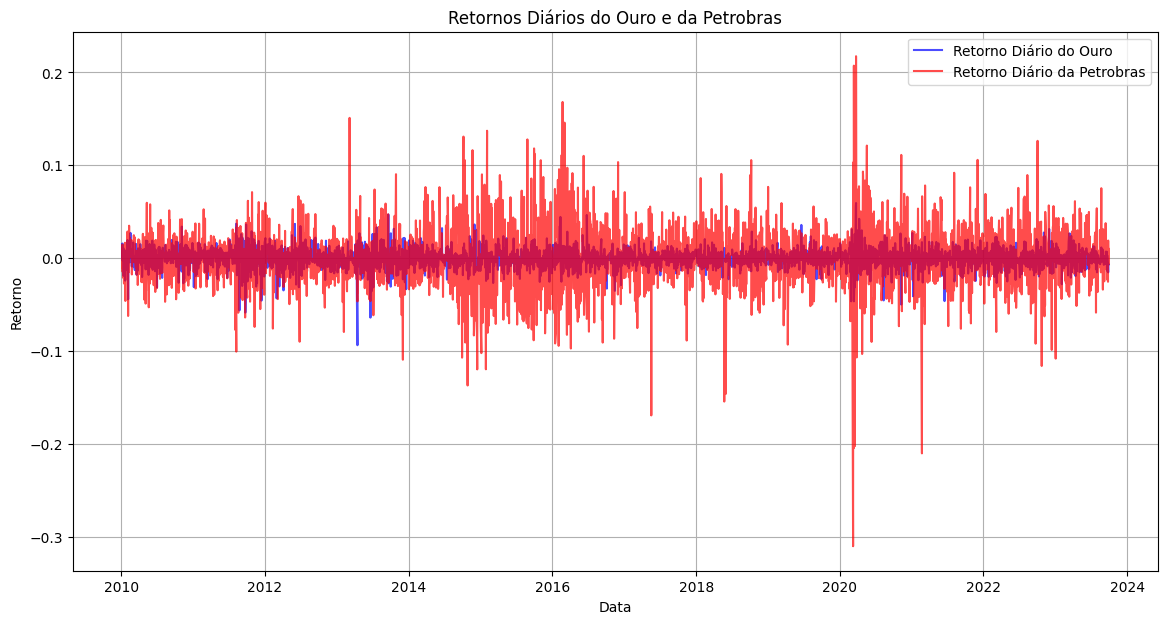

In [7]:
gold_data['Daily Return'] = gold_data['Close'].pct_change()
petrobras_data['Daily Return'] = petrobras_data['Close'].pct_change()

plt.figure(figsize=(14, 7))
plt.plot(gold_data['Daily Return'], label='Retorno Diário do Ouro', color='blue', alpha=0.7)
plt.plot(petrobras_data['Daily Return'], label='Retorno Diário da Petrobras', color='red', alpha=0.7)
plt.title('Retornos Diários do Ouro e da Petrobras')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True)
plt.show()

# 3.4. Distribuição dos Retornos
Analise a distribuição dos retornos diários:

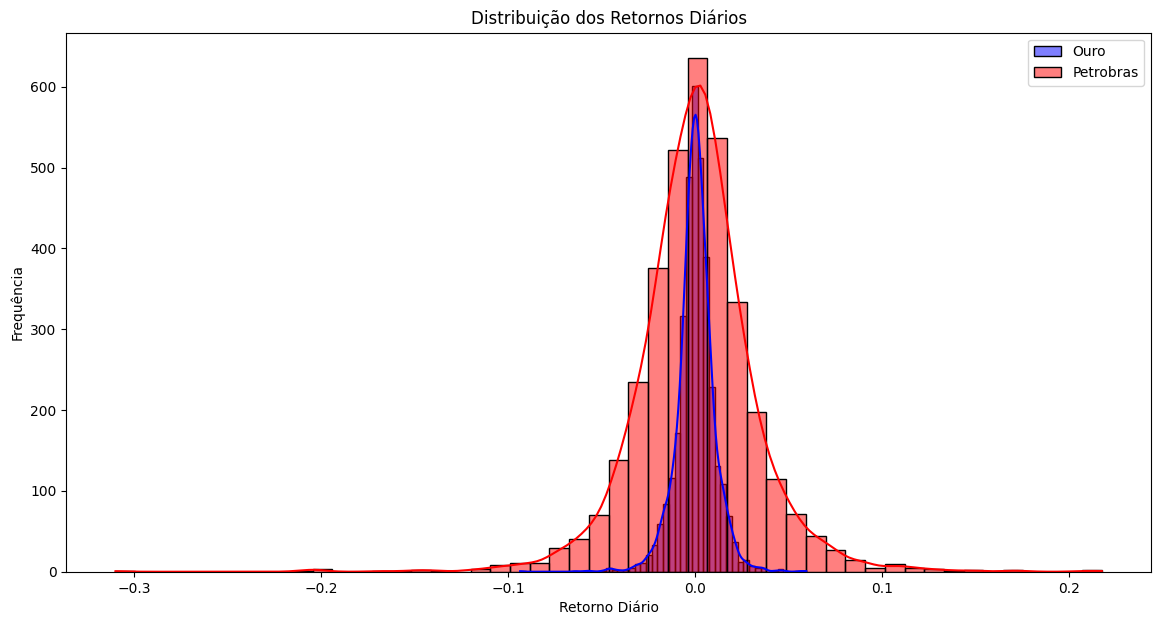

In [8]:
plt.figure(figsize=(14, 7))
sns.histplot(gold_data['Daily Return'].dropna(), bins=50, color='blue', kde=True, label='Ouro')
sns.histplot(petrobras_data['Daily Return'].dropna(), bins=50, color='red', kde=True, label='Petrobras')
plt.title('Distribuição dos Retornos Diários')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# 4. Análise Quantitativa
# 4.1. Volatilidade
Calcule a volatilidade (desvio padrão dos retornos):

In [9]:
gold_volatility = gold_data['Daily Return'].std()
petrobras_volatility = petrobras_data['Daily Return'].std()

print(f'Volatilidade Anualizada do Ouro: {gold_volatility * np.sqrt(252):.2%}')
print(f'Volatilidade Anualizada da Petrobras: {petrobras_volatility * np.sqrt(252):.2%}')

Volatilidade Anualizada do Ouro: 16.05%
Volatilidade Anualizada da Petrobras: 51.09%


# 4.2. Médias Móveis
Calcule e visualize médias móveis para identificar tendências:

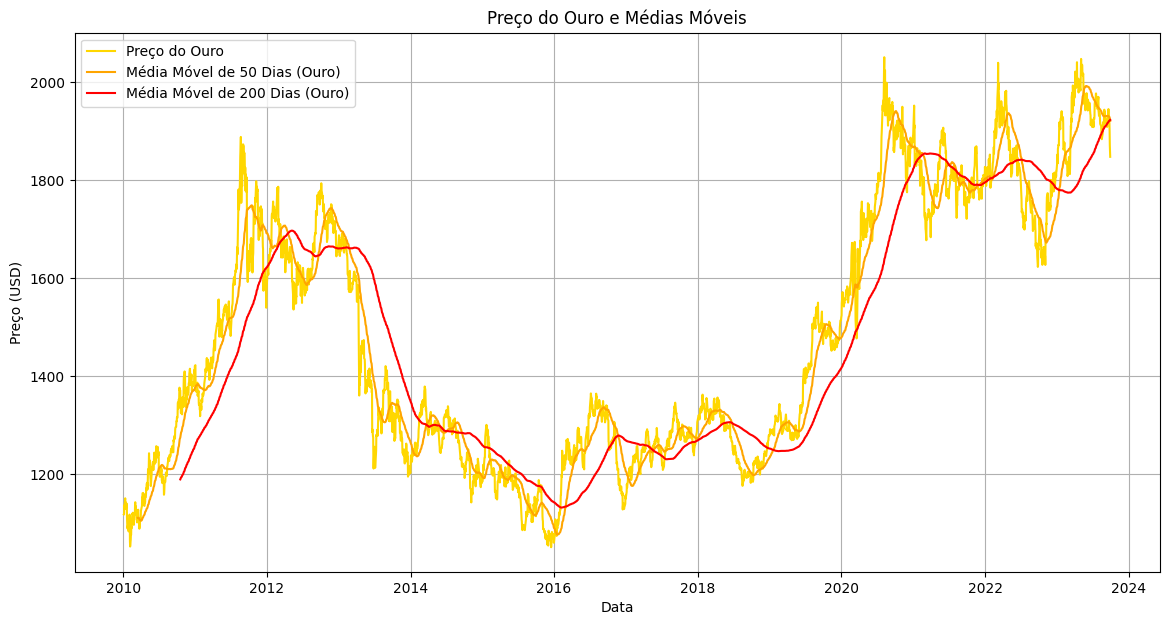

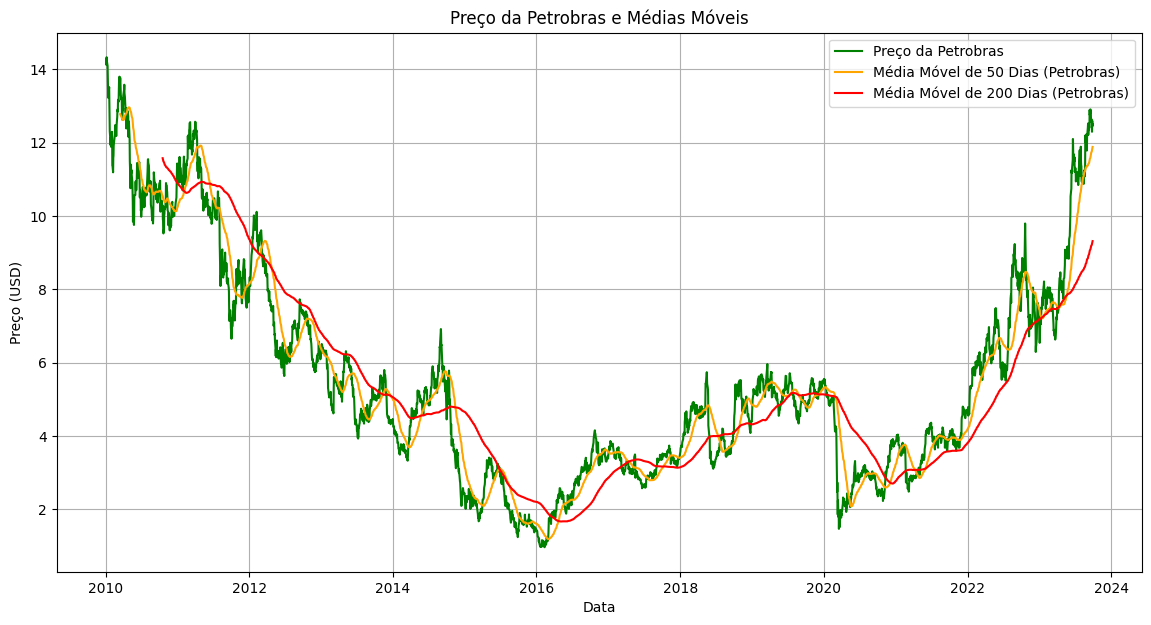

In [10]:
gold_data['50 Day MA'] = gold_data['Close'].rolling(window=50).mean()
gold_data['200 Day MA'] = gold_data['Close'].rolling(window=200).mean()

petrobras_data['50 Day MA'] = petrobras_data['Close'].rolling(window=50).mean()
petrobras_data['200 Day MA'] = petrobras_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(gold_data['Close'], label='Preço do Ouro', color='gold')
plt.plot(gold_data['50 Day MA'], label='Média Móvel de 50 Dias (Ouro)', color='orange')
plt.plot(gold_data['200 Day MA'], label='Média Móvel de 200 Dias (Ouro)', color='red')
plt.title('Preço do Ouro e Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(petrobras_data['Close'], label='Preço da Petrobras', color='green')
plt.plot(petrobras_data['50 Day MA'], label='Média Móvel de 50 Dias (Petrobras)', color='orange')
plt.plot(petrobras_data['200 Day MA'], label='Média Móvel de 200 Dias (Petrobras)', color='red')
plt.title('Preço da Petrobras e Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 4.3. Correlação entre Commodities e Ações
Calcule a correlação entre os retornos de commodities e ações:

               Ouro  Petrobras
Ouro       1.000000   0.088606
Petrobras  0.088606   1.000000


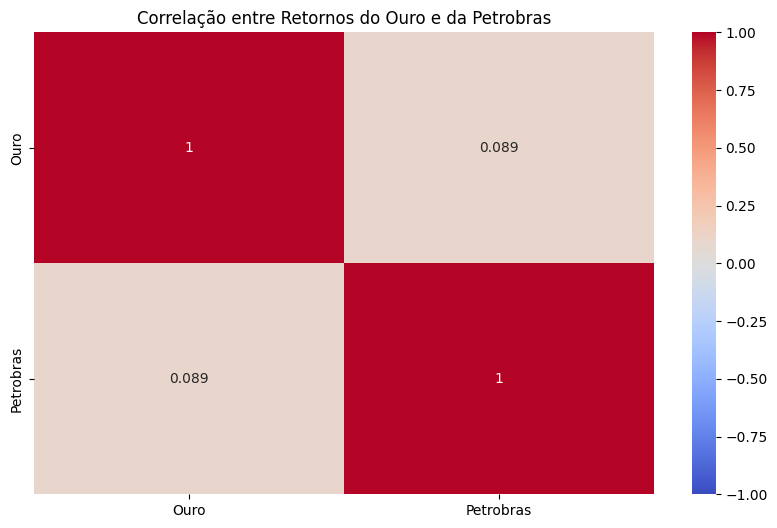

In [11]:
# Criar DataFrame de retornos
returns = pd.DataFrame({
    'Ouro': gold_data['Daily Return'],
    'Petrobras': petrobras_data['Daily Return']
}).dropna()

# Matriz de correlação
correlation_matrix = returns.corr()
print(correlation_matrix)

# Heatmap da correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Retornos do Ouro e da Petrobras')
plt.show()

# 5. Modelagem e Previsão
# 5.1. Decomposição de Séries Temporais
Use a decomposição para separar tendência, sazonalidade e resíduos:

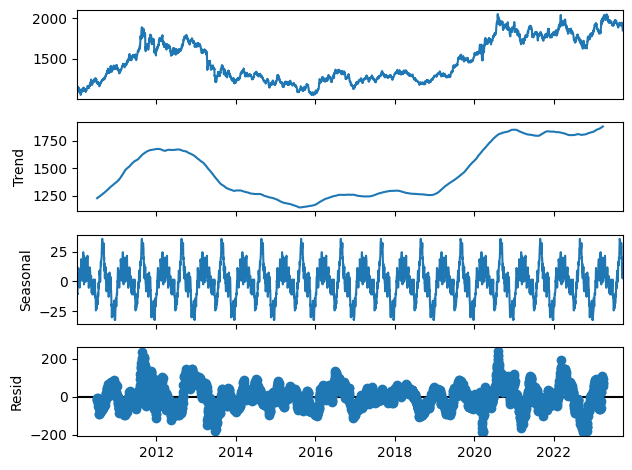

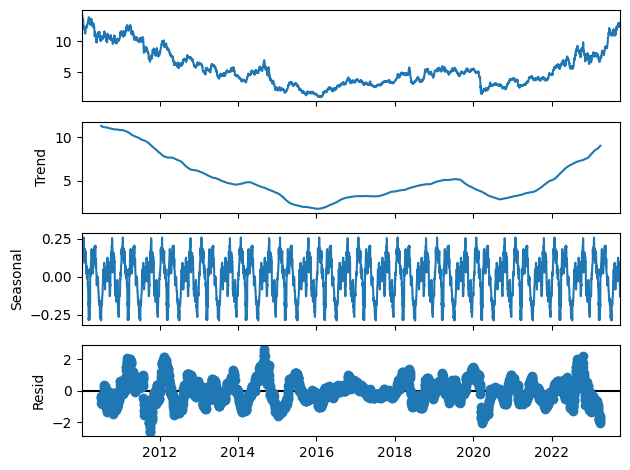

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_gold = seasonal_decompose(gold_data['Close'].dropna(), period=252)
decomposition_gold.plot()
plt.show()

decomposition_petrobras = seasonal_decompose(petrobras_data['Close'].dropna(), period=252)
decomposition_petrobras.plot()
plt.show()

# 5.2. Modelo ARIMA
Ajuste um modelo ARIMA para prever preços futuros:

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   GC=F   No. Observations:                 3456
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14369.136
Date:                Fri, 07 Mar 2025   AIC                          28750.273
Time:                        13:43:01   BIC                          28787.158
Sample:                             0   HQIC                         28763.445
                               - 3456                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0287      0.012     -2.347      0.019      -0.053      -0.005
ar.L2         -0.0094      0.012     -0.788      0.431      -0.033       0.014
ar.L3          0.0060      0.014      0.443      0.6

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


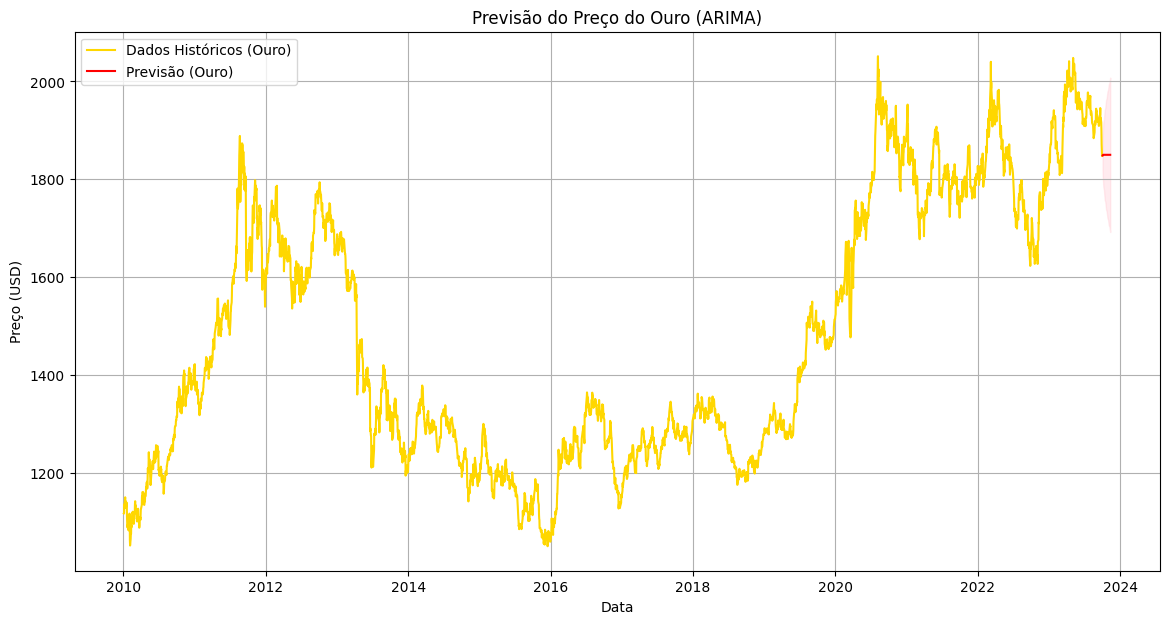

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar modelo ARIMA para o ouro
model_gold = ARIMA(gold_data['Close'].dropna(), order=(5, 1, 0))
results_gold = model_gold.fit()
print(results_gold.summary())

# Previsão para os próximos 30 dias
forecast_gold = results_gold.get_forecast(steps=30)
forecast_index_gold = pd.date_range(gold_data.index[-1], periods=31, freq='B')[1:]
forecast_values_gold = forecast_gold.predicted_mean
confidence_intervals_gold = forecast_gold.conf_int()

# Plotar previsão
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Close'], label='Dados Históricos (Ouro)', color='gold')
plt.plot(forecast_index_gold, forecast_values_gold, label='Previsão (Ouro)', color='red')
plt.fill_between(forecast_index_gold, confidence_intervals_gold.iloc[:, 0], confidence_intervals_gold.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Previsão do Preço do Ouro (ARIMA)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 6. Estratégias de Trading
# 6.1. Crossover de Médias Móveis
Uma estratégia simples é comprar quando a média de curto prazo cruza acima da média de longo prazo e vender quando ocorre o contrário:

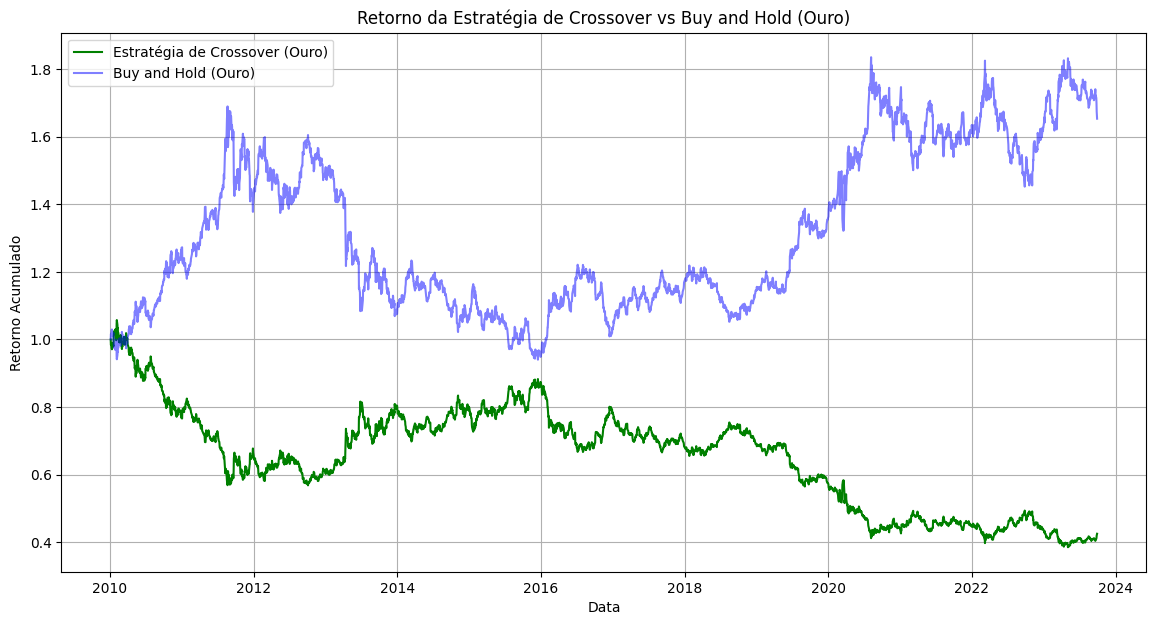

In [ ]:
gold_data['Signal'] = np.where(gold_data['50 Day MA'] > gold_data['200 Day MA'], 1, -1)
gold_data['Strategy Return'] = gold_data['Signal'].shift(1) * gold_data['Daily Return']

# Plotar retornos da estratégia
plt.figure(figsize=(14, 7))
plt.plot((1 + gold_data['Strategy Return']).cumprod(), label='Estratégia de Crossover (Ouro)', color='green')
plt.plot((1 + gold_data['Daily Return']).cumprod(), label='Buy and Hold (Ouro)', color='blue', alpha=0.5)
plt.title('Retorno da Estratégia de Crossover vs Buy and Hold (Ouro)')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True)
plt.show()

# 7. Conclusão
Essa análise quantitativa de commodities e ações cobre desde a coleta de dados até a modelagem e estratégias de trading. Dependendo do seu objetivo, você pode expandir a análise para incluir mais ativos, modelos mais complexos ou técnicas de machine learning.